In [3]:
## HACKTHISFALL-2
### Team_Name: StormBreakers
#### Project: Currency Forecasting

In [ ]:
import pandas as pd

In [4]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [5]:
dollars= pd.read_csv('dollars.csv')
euros= pd.read_csv('euros.csv')
pounds= pd.read_csv('pounds.csv')

In [6]:
dollars.tail()

Date       Open       High        Low      Close  Adj Close  \
1300  2021-10-18  75.005997  75.521004  74.940498  75.005898  75.005898   
1301  2021-10-19  75.237999  75.267097  74.882004  75.235497  75.235497   
1302  2021-10-20  75.120201  75.182999  74.749802  75.120102  75.120102   
1303  2021-10-21  74.809303  74.912498  74.634003  74.809196  74.809196   
1304  2021-10-22  74.866501  75.099800  74.684601  74.865402  74.865402   

      Volume  
1300     0.0  
1301     0.0  
1302     0.0  
1303     0.0  
1304     0.0

In [7]:
euros.tail()

Date       Open       High        Low      Close  Adj Close  \
1300  2021-10-18  86.026100  87.413002  86.026100  86.957001  86.957001   
1301  2021-10-19  87.307999  87.551003  87.184998  87.290001  87.290001   
1302  2021-10-20  87.306999  87.477997  86.911003  87.295998  87.295998   
1303  2021-10-21  87.084999  87.266998  86.978996  87.092003  87.092003   
1304  2021-10-22  86.958000  87.228996  86.823997  86.950996  86.950996   

      Volume  
1300     0.0  
1301     0.0  
1302     0.0  
1303     0.0  
1304     0.0

In [8]:
pounds.tail()

Date        Open        High         Low       Close   Adj Close  \
1300  2021-10-18  103.245361  103.809883  102.936020  103.246361  103.246361   
1301  2021-10-19  103.327477  103.850662  103.156960  103.327477  103.327477   
1302  2021-10-20  103.609795  103.818825  102.917320  103.609795  103.609795   
1303  2021-10-21  103.423721  103.709671  103.121445  103.423721  103.423721   
1304  2021-10-22  103.271126  103.590485  102.932388  103.271126  103.271126   

      Volume  
1300     0.0  
1301     0.0  
1302     0.0  
1303     0.0  
1304     0.0

In [9]:
dollars= dollars[['Date','Close']]

In [10]:
dollars

Date      Close
0     2016-10-24  66.911201
1     2016-10-25  66.834000
2     2016-10-26  66.781303
3     2016-10-27  66.863998
4     2016-10-28  66.903000
...          ...        ...
1300  2021-10-18  75.005898
1301  2021-10-19  75.235497
1302  2021-10-20  75.120102
1303  2021-10-21  74.809196
1304  2021-10-22  74.865402

[1305 rows x 2 columns]

In [11]:
euros= euros[['Date','Close']]

In [12]:
pounds= pounds[['Date','Close']]

In [13]:
euros.shape

(1305, 2)

In [14]:
dollars.shape

(1305, 2)

In [15]:
pounds.shape

(1305, 2)

In [16]:
pounds

Date       Close
0     2016-10-24   81.799004
1     2016-10-25   81.694000
2     2016-10-26   81.302002
3     2016-10-27   81.820999
4     2016-10-28   81.419998
...          ...         ...
1300  2021-10-18  103.246361
1301  2021-10-19  103.327477
1302  2021-10-20  103.609795
1303  2021-10-21  103.423721
1304  2021-10-22  103.271126

[1305 rows x 2 columns]

In [17]:
pounds['Date']=pd.to_datetime(pounds['Date'])

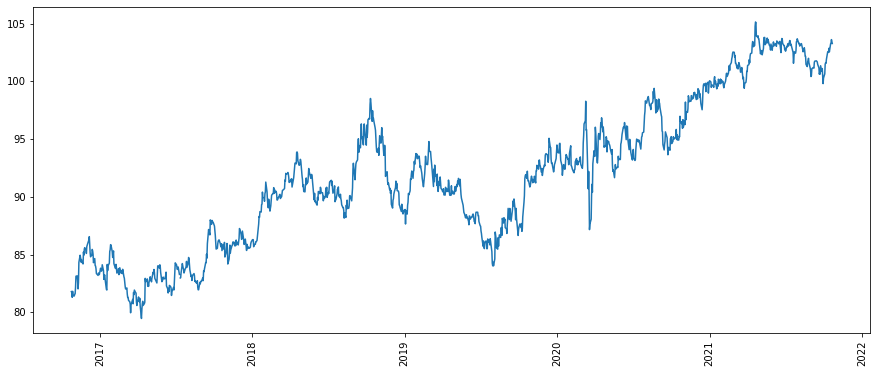

In [18]:
plt.figure(figsize=(15,6))
plt.plot(pounds['Date'],pounds['Close'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
m3=Prophet()
pounds.columns=['ds','y'] 

In [20]:
model3=m3.fit(pounds)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future3=m3.make_future_dataframe(periods=1825,freq='D')
forecast3=m3.predict(future3)
forecast3.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3125 2026-10-17  132.133191  -84.479382  347.560733   -82.314480   350.023978   
3126 2026-10-18  132.148927  -85.906850  346.496704   -82.492675   350.269829   
3127 2026-10-19  132.164663  -82.140358  349.770707   -82.670870   350.516147   
3128 2026-10-20  132.180399  -84.077581  348.700316   -82.849065   350.762648   
3129 2026-10-21  132.196135  -84.434207  348.907908   -83.027259   351.004700   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
3125       -2.460757             -2.460757             -2.460757 -1.433907   
3126       -2.463627             -2.463627             -2.463627 -1.433907   
3127       -0.613518             -0.613518             -0.613518  0.421940   
3128       -0.452002             -0.452002             -0.452002  0.591645   
3129       -0.429227             -0.429227             -0.429227  0.624574   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
3125     -1.433907     -1.433907 -1.026851     -1.026851     -1.026851   
3126     -1.433907     -1.433907 -1.029720     -1.029720     -1.029720   
3127      0.421940      0.421940 -1.035458     -1.035458     -1.035458   
3128      0.591645      0.591645 -1.043646     -1.043646     -1.043646   
3129      0.624574      0.624574 -1.053800     -1.053800     -1.053800   

      multiplicative_terms  multiplicative_terms_lower  \
3125                   0.0                         0.0   
3126                   0.0                         0.0   
3127                   0.0                         0.0   
3128                   0.0                         0.0   
3129                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
3125                         0.0  129.672434  
3126                         0.0  129.685300  
3127                         0.0  131.551145  
3128                         0.0  131.728397  
3129                         0.0  131.766908

In [22]:
temp_df= forecast3[['ds','yhat_upper','yhat','yhat_lower']]

In [23]:
temp_df

ds  yhat_upper        yhat  yhat_lower
0    2016-10-24   85.115379   83.567093   81.928095
1    2016-10-25   85.484798   83.723366   82.194464
2    2016-10-26   85.370951   83.744050   82.125386
3    2016-10-27   85.351085   83.730115   82.059996
4    2016-10-28   85.171814   83.709076   82.196797
...         ...         ...         ...         ...
3125 2026-10-17  347.560733  129.672434  -84.479382
3126 2026-10-18  346.496704  129.685300  -85.906850
3127 2026-10-19  349.770707  131.551145  -82.140358
3128 2026-10-20  348.700316  131.728397  -84.077581
3129 2026-10-21  348.907908  131.766908  -84.434207

[3130 rows x 4 columns]

In [24]:
from fbprophet.plot import plot_plotly,plot_components_plotly
plot_plotly(m3,forecast3)

In [25]:
#pounds['Date']=pd.to_datetime(pounds['Date'])
#m3=Prophet()
#pounds.columns=['ds','y']
#model3=m3.fit(pounds)
#future3=m3.make_future_dataframe(periods=1825,freq='D')
#forecast3=m3.predict(future3)
#plot_plotly(m3,forecast3)


In [26]:
dollars['Date']=pd.to_datetime(dollars['Date'])
m2=Prophet()
dollars.columns=['ds','y']
model2=m2.fit(dollars)
future2=m2.make_future_dataframe(periods=1825,freq='D')
forecast2=m2.predict(future3)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
plot_plotly(m2,forecast2)

In [28]:
#euros['Date']=pd.to_datetime(euros['Date'])
m1=Prophet()
euros.columns=['ds','y']
model1=m1.fit(euros)
future1=m1.make_future_dataframe(periods=1825,freq='D')
forecast1=m1.predict(future1)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
plot_plotly(m1,forecast1)

In [30]:
## forecast3 = pounds
## forecast2 = dollars
## forecast1 = euros

In [31]:
import pickle
pickle.dump(forecast3,open('pounds3.pkl','wb'))

In [32]:
pickle.dump(forecast2,open('dollars2.pkl','wb'))

In [33]:
pickle.dump(forecast1,open('euros1.pkl','wb'))

In [39]:
## EUROS

import plotly.express as px

fig1 = px.line(forecast1, x="ds", y="yhat", title='Forecast of Euros')
fig1.show()

In [42]:
## DOLLARS

fig2 = px.line(forecast2, x="ds", y="yhat", title='Forecast of Dollars')
fig2.show()

In [41]:
## POUNDS

fig3 = px.line(forecast3, x="ds", y="yhat", title='Forecast of Pounds')
fig3.show()